# 6.5: Unsupervised Machine Learning: Clustering

In unsupervised learning, there’s no dependent variable. All you have is an input variable (or variables), X. You don’t actually know what you’re looking for, so you don’t have a y, and there’s also no way to “supervise” your model. Instead, you let the algorithm search for patterns in the data on its own and surprise you with unexpected results.

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
The Elbow Technique
The trickiest part of using the k-means algorithm is more conceptual than it is technical—you need to come up with a reasonable number of clusters to group your data in. While you could simply follow a trial-and-error approach, this is time consuming and error prone. Instead, you’ll use what’s called the elbow technique. The optimal number of clusters shouldn’t be too many (otherwise, there won’t be much difference between them), while also not being too few (otherwise, you won’t get enough granularity). What the elbow technique does, then, is show you the breaking point, or “elbow,” at which adding more clusters won’t help better explain the variances in your data.

#### 3. k-means clustering


To use the k-means algorithm, you start by determining the desired number of clusters (k) you want it to create. Each data point can only be assigned to a single cluster. As such, the algorithm starts by picking one random centroid for each cluster. This center will continue to change. That’s because the k-means algorithm works by iteratively calculating the distance between a data point and the centroid of each cluster and, in the process, moving the centroid so that it’s situated as close as possible to all the data points within the cluster. 

**The k-means algorithm:**

1. Assigns each point in the data set to the centroid that’s closest to it in value.
2. Calculates the new mean for each centroid.
3. Repeats steps 1 and 2 until it can’t come up with new values for the positions of the centroids.

## 1. Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:

path = r'C:\Users\mutta\Documents\Project 6'

join = os.path.join(path,
                    '02 Data', 
                    'Prepared Data', 
                    '01 CSV',
                    '05. Unsupervised Machine Learning Clustering',
                    'Stunting_OBS_compact.csv')

pd.options.display.float_format = '{:.2f}'.format
df_Stunting = pd.read_csv(join, index_col = False, encoding= 'unicode_escape')
df_Stunting.round(2)

join = os.path.join(path, 
                    '02 Data',
                    'Prepared Data',
                    '01 CSV',
                    '05. Unsupervised Machine Learning Clustering',
                    'Mortality_Stunting_OBS_compact.csv')
df_mortality = pd.read_csv(join, index_col = False, encoding= 'unicode_escape')
df_mortality.round(2)

# Merge the dataframes on 'Country' and 'Year'
merged_df = pd.merge(df_Stunting, df_mortality, on=['Country', 'Year'])

merged_df.describe(include='all')

,Country,Year,National Point Estimate,OBS Value_mortality
count,1000,1000.00,1000.00,1000.00
unique,157,NaN,NaN,NaN
top,Bangladesh,NaN,NaN,NaN
freq,26,NaN,NaN,NaN
mean,NaN,2005.94,27.62,27.61
std,NaN,9.48,15.92,15.92
min,NaN,1983.00,0.00,0.00
25%,NaN,1999.00,14.55,14.49
50%,NaN,2007.00,27.60,27.59
75%,NaN,2014.00,38.92,38.93


In [3]:
filtered_columns_df = merged_df.drop(['Country'], axis = 1)

In [4]:
filtered_columns_df.dtypes

Year                         int64
National Point Estimate    float64
OBS Value_mortality        float64
dtype: object

### 2. The elbow technique

In [5]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i, n_init='auto') for i in num_cl] # Defines k-means clusters in the range assigned above.


score = [kmeans[i].fit(filtered_columns_df).score(filtered_columns_df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\mutta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\mutta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\mutta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\mutta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

[-596475.9431675763,
 -241887.1977866475,
 -155924.7345021563,
 -124550.06093028649,
 -100593.91772528856,
 -79808.23054709168,
 -68368.6311623255,
 -59634.37699525094,
 -52802.464722566736]

##### The k-means algorithm has given you ten numbers. Each of these ten numbers represents a rate of variation for the given cluster option (e.g., if the data had only one cluster, two clusters, three clusters, all the way up to ten clusters

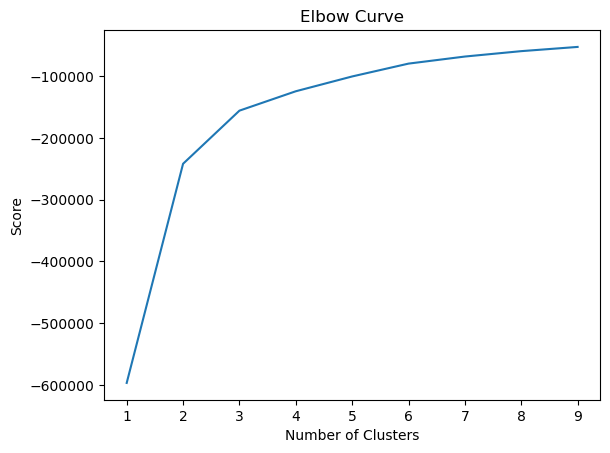

In [6]:
import plotly.express as px

x = num_cl
y = score


# Plot the elbow curve using PyLab.

pl.plot(x,y)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The elbow, or the breaking point of the curve, is where the curve begins to flatten out. From above figure graph the line graph jumps rapidly from one to 4 on the x-axis, then rises only slightly after four. 

That means the optimal count for our clusters is four

## 3. k-means clustering

#### First,  create the k-means object with 4 cluster

In [7]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [8]:
# Fit the k-means object to the data.

kmeans.fit(filtered_columns_df)

C:\Users\mutta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mutta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(n_clusters=4)

In [9]:
filtered_columns_df['clusters'] = kmeans.fit_predict(filtered_columns_df)

C:\Users\mutta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mutta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [10]:
filtered_columns_df.head()

,Year,National Point Estimate,OBS Value_mortality,clusters
0,1997,53.20,53.20,2
1,2004,59.30,59.27,2
2,2013,40.40,40.40,3
3,2018,38.20,38.20,3
4,2005,26.70,26.53,3


In [11]:
filtered_columns_df.describe()

,Year,National Point Estimate,OBS Value_mortality,clusters
count,1000.00,1000.00,1000.00,1000.00
mean,2005.94,27.62,27.61,1.40
std,9.48,15.92,15.92,1.22
min,1983.00,0.00,0.00,0.00
25%,1999.00,14.55,14.49,0.00
50%,2007.00,27.60,27.59,1.00
75%,2014.00,38.92,38.93,3.00
max,2022.00,73.60,73.60,3.00


In [12]:
filtered_columns_df['clusters'].value_counts()

0    351
3    271
2    206
1    172
Name: clusters, dtype: int64

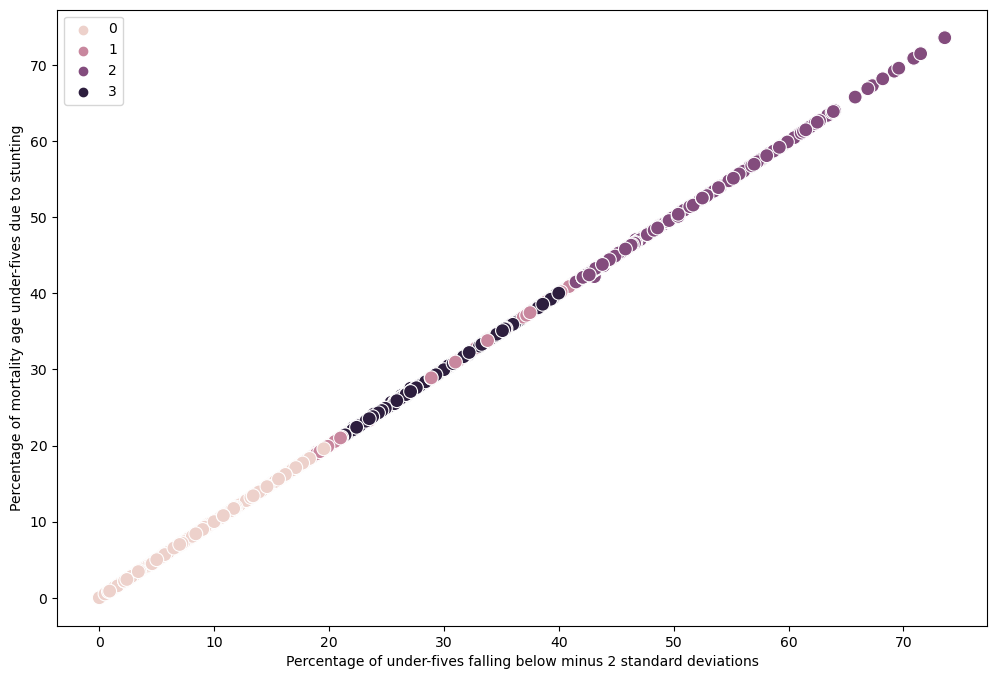

In [13]:
# Plot the clusters for the "National Point Estimate" and "OBS Value_mortality" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=filtered_columns_df['National Point Estimate'], 
                     y=filtered_columns_df['OBS Value_mortality'], 
                     hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.



ax.grid(False) # This removes the grid from the background.
plt.xlabel('Percentage of under-fives falling below minus 2 standard deviations') # Label x-axis.
plt.ylabel('Percentage of mortality age under-fives due to stunting') # Label y-axis.
plt.show()

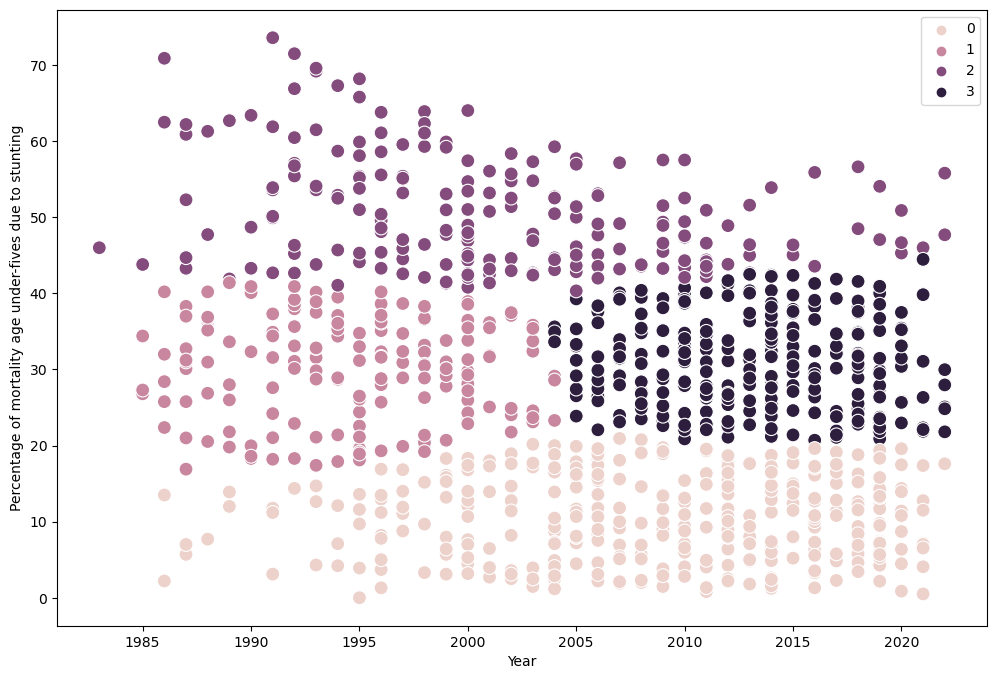

In [14]:
# Plot the clusters for the "Year" and "Percentage of mortality age under-fives due to stunting" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=filtered_columns_df['Year'], y=filtered_columns_df['OBS Value_mortality'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Year') 
plt.ylabel('Percentage of mortality age under-fives due to stunting') 
plt.show()

In [15]:
filtered_columns_df.loc[filtered_columns_df['clusters'] == 3, 'cluster'] = 'black'
filtered_columns_df.loc[filtered_columns_df['clusters'] == 2, 'cluster'] = 'dark purple'
filtered_columns_df.loc[filtered_columns_df['clusters'] == 1, 'cluster'] = 'purple'
filtered_columns_df.loc[filtered_columns_df['clusters'] == 0, 'cluster'] = 'pink'


In [16]:
filtered_columns_df.groupby('clusters').agg({'Year':['mean', 'median'], 
                                             'National Point Estimate':['mean', 'median'], 
                                              'OBS Value_mortality':['mean', 'median']}).to_dict()


{('Year', 'mean'): {0: 2008.6695156695157,
  1: 1994.9476744186047,
  2: 2001.1359223300972,
  3: 2013.0258302583027},
 ('Year', 'median'): {0: 2010.0, 1: 1995.0, 2: 2000.0, 3: 2013.0},
 ('National Point Estimate', 'mean'): {0: 10.4988603988604,
  1: 29.744767441860468,
  2: 50.54441747572815,
  3: 31.02367773678967},
 ('National Point Estimate', 'median'): {0: 10.7,
  1: 30.1,
  2: 48.849999999999994,
  3: 30.8},
 ('OBS Value_mortality', 'mean'): {0: 10.487863247863249,
  1: 29.734651162790694,
  2: 50.53718446601942,
  3: 31.013247232472324},
 ('OBS Value_mortality', 'median'): {0: 10.67,
  1: 30.115000000000002,
  2: 48.915,
  3: 30.77}}

#### Judging by these statistics, some of the facts

1. Cluster 0: This cluster has a moderate mean and median "Year" value, indicating a relatively recent time period. The mean and median "National Point Estimate" values are moderate, suggesting a moderate prevalence of stunting. The mean and median "OBS Value_mortality" values are relatively high, indicating a higher percentage of mortality among stunted children.

2. Cluster 1: This cluster has a higher mean and median "Year" value, indicating a slightly more recent time period compared to Cluster 0. The mean and median "National Point Estimate" values are low, suggesting a lower prevalence of stunting. The mean and median "OBS Value_mortality" values are also relatively low, indicating a lower percentage of mortality among stunted children.

3. Cluster 2: This cluster has a lower mean and median "Year" value, indicating an older time period compared to the other clusters. The mean and median "National Point Estimate" values are moderate, suggesting a moderate prevalence of stunting. The mean and median "OBS Value_mortality" values are also moderate, indicating a moderate percentage of mortality among stunted children.

4. Cluster 3: This cluster has a slightly lower mean and median "Year" value compared to Cluster 0. The mean and median "National Point Estimate" values are relatively high, suggesting a higher prevalence of stunting. The mean and median "OBS Value_mortality" values are significantly high, indicating a significantly higher percentage of mortality among stunted children compared to the other clusters.



## Future steps depending on the above results

It requires further analysis 

+ why the mortality rate is higher in cluster 3. 


+ Cluster 2 & 3 points belongs to which reasons/countries. 


+ Is there any relation in the gender values among the clustor?
